In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
os.chdir('C:\\RESEARCH\\LUSC\\Stage')

In [3]:
X=pd.read_excel('LUSC_Genes_Stage.xlsx',index_col=0)

In [4]:
X.shape

(501, 14838)

In [5]:
X.head(2)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,SLFN12,SLFN13,SLFN14,SLFN5,SLFNL1,SLIT1,SLIT2,SLIT3,SLITRK1,Neoplasm Disease Stage American Joint Committee on Cancer Code3
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-18-3406-01,0.6275,-0.0763,-0.1111,-0.0210,-0.2073,-0.2939,6.0843,-0.1684,-0.1354,1.6552,...,0.3141,0.7349,-0.6499,1.8195,-0.9816,-0.1401,-0.5147,-0.5814,-0.2205,Stage IA
TCGA-18-3407-01,-0.8280,-0.0763,-0.1111,-0.2912,-0.2073,-0.2723,-0.7020,0.3242,-0.1354,0.4132,...,0.0783,-0.4010,-0.1467,1.5143,-0.1113,-0.2146,-0.3133,-0.4178,-0.2303,Stage IB


In [6]:
x=X.iloc[:,0:14836].values
y=X.iloc[:,-1].values

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [10]:
# Fitting Gradient Boosting  Classification to the Validation set
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier = classifier.fit(X_train, y_train)
classifier.score(X_val, y_val)

0.25

In [11]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [15]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6]+cm[7][7]+cm[8][8]) / cm.sum())
accuracy

0.25

Confusion Matrix, without normalization
[[ 0  0  0  0  1  0  0  0  0]
 [ 0  1  7  1  1  0  2  0  0]
 [ 0  2 10  3  4  0  4  0  0]
 [ 0  1  4  3  3  0  0  0  0]
 [ 0  3  7  2  2  0  1  1  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  2  3  0  3  0  3  0  0]
 [ 0  1  1  0  0  0  0  1  0]
 [ 0  0  1  0  1  0  0  0  0]]


<Figure size 720x504 with 0 Axes>

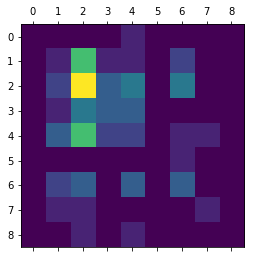

In [14]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.         0.         0.         0.         1.         0.
  0.         0.         0.        ]
 [0.         0.08333333 0.58333333 0.08333333 0.08333333 0.
  0.16666667 0.         0.        ]
 [0.         0.08695652 0.43478261 0.13043478 0.17391304 0.
  0.17391304 0.         0.        ]
 [0.         0.09090909 0.36363636 0.27272727 0.27272727 0.
  0.         0.         0.        ]
 [0.         0.1875     0.4375     0.125      0.125      0.
  0.0625     0.0625     0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.         0.18181818 0.27272727 0.         0.27272727 0.
  0.27272727 0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.         0.
  0.         0.33333333 0.        ]
 [0.         0.         0.5        0.         0.5        0.
  0.         0.         0.        ]]


<Figure size 432x288 with 0 Axes>

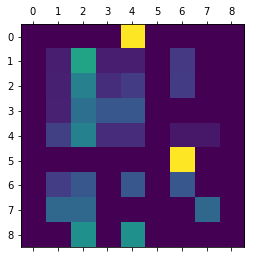

In [16]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [17]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.10      0.08      0.09        12
           2       0.30      0.43      0.36        23
           4       0.33      0.27      0.30        11
           5       0.13      0.12      0.13        16
           6       0.00      0.00      0.00         1
           7       0.27      0.27      0.27        11
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         2

   micro avg       0.25      0.25      0.25        80
   macro avg       0.18      0.17      0.17        80
weighted avg       0.23      0.25      0.24        80



C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.05107880387296812

In [19]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: 

In [ ]:

"""
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1, 10, 100, 1000], 'kernel' : ['linear']},
              {'C' : [1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Gradient Boosting  Classification to the Validation set
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier = classifier.fit(X_train, y_train)
classifier.score(X_val, y_val)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
